# **Introduction:**

**1. Purpose of the Notebook:** <li>This notebook elaborates about wavelet transform and how overcomes the problems faced in Fourier Transform

**2. Learning Outcomes:** <li>Wavelet Transform role in daily life such as ECG, EEG, etc.

**3. Prerequisites:** <li>Wavelet and Fourier Transform

# **Setup:**

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import scipy as sp
from scipy.io import wavfile
import scipy.signal as signal
import pywt # PyWavelet: For wavelet transformation
import cv2

# **Conceptual Overview:**

In [2]:
# All families of Wavelets in PyWavelets
print("Wave Families")
pywt.families(short=False)

Wave Families


['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

## **Wave Family Members**

In [3]:
print("Dicrete Wavelets")
pywt.wavelist(family=None, kind="discrete")

Dicrete Wavelets


['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'haar',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',
 'rbio3.3',
 'rbio3.5',
 'rbio3.7',
 'rbio3.9',
 'rbio4.4',
 'rbio5.5',
 'rbio6.8',
 'sym2',
 'sym3',
 'sym4',
 'sym5',
 'sym6',
 'sym7',
 'sym8',
 'sym9',
 'sym10',
 'sym11',
 'sym12',
 'sym13',

In [4]:
print("Continuous Wavelets")
pywt.wavelist(family=None, kind="continuous")

Continuous Wavelets


['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

## **Modes**

In [5]:
print("Modes:")
pywt.Modes.modes

Modes:


['zero',
 'constant',
 'symmetric',
 'periodic',
 'smooth',
 'periodization',
 'reflect',
 'antisymmetric',
 'antireflect']

# **Code Sample:**

## **Audio Processing**

### **Single Level Decomposition**

C:\Users\Himanish Rajan\AppData\Local\Temp\ipykernel_25188\3057127703.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, song = wavfile.read("AudioSample.wav")


Time in s:  11.929092970521541


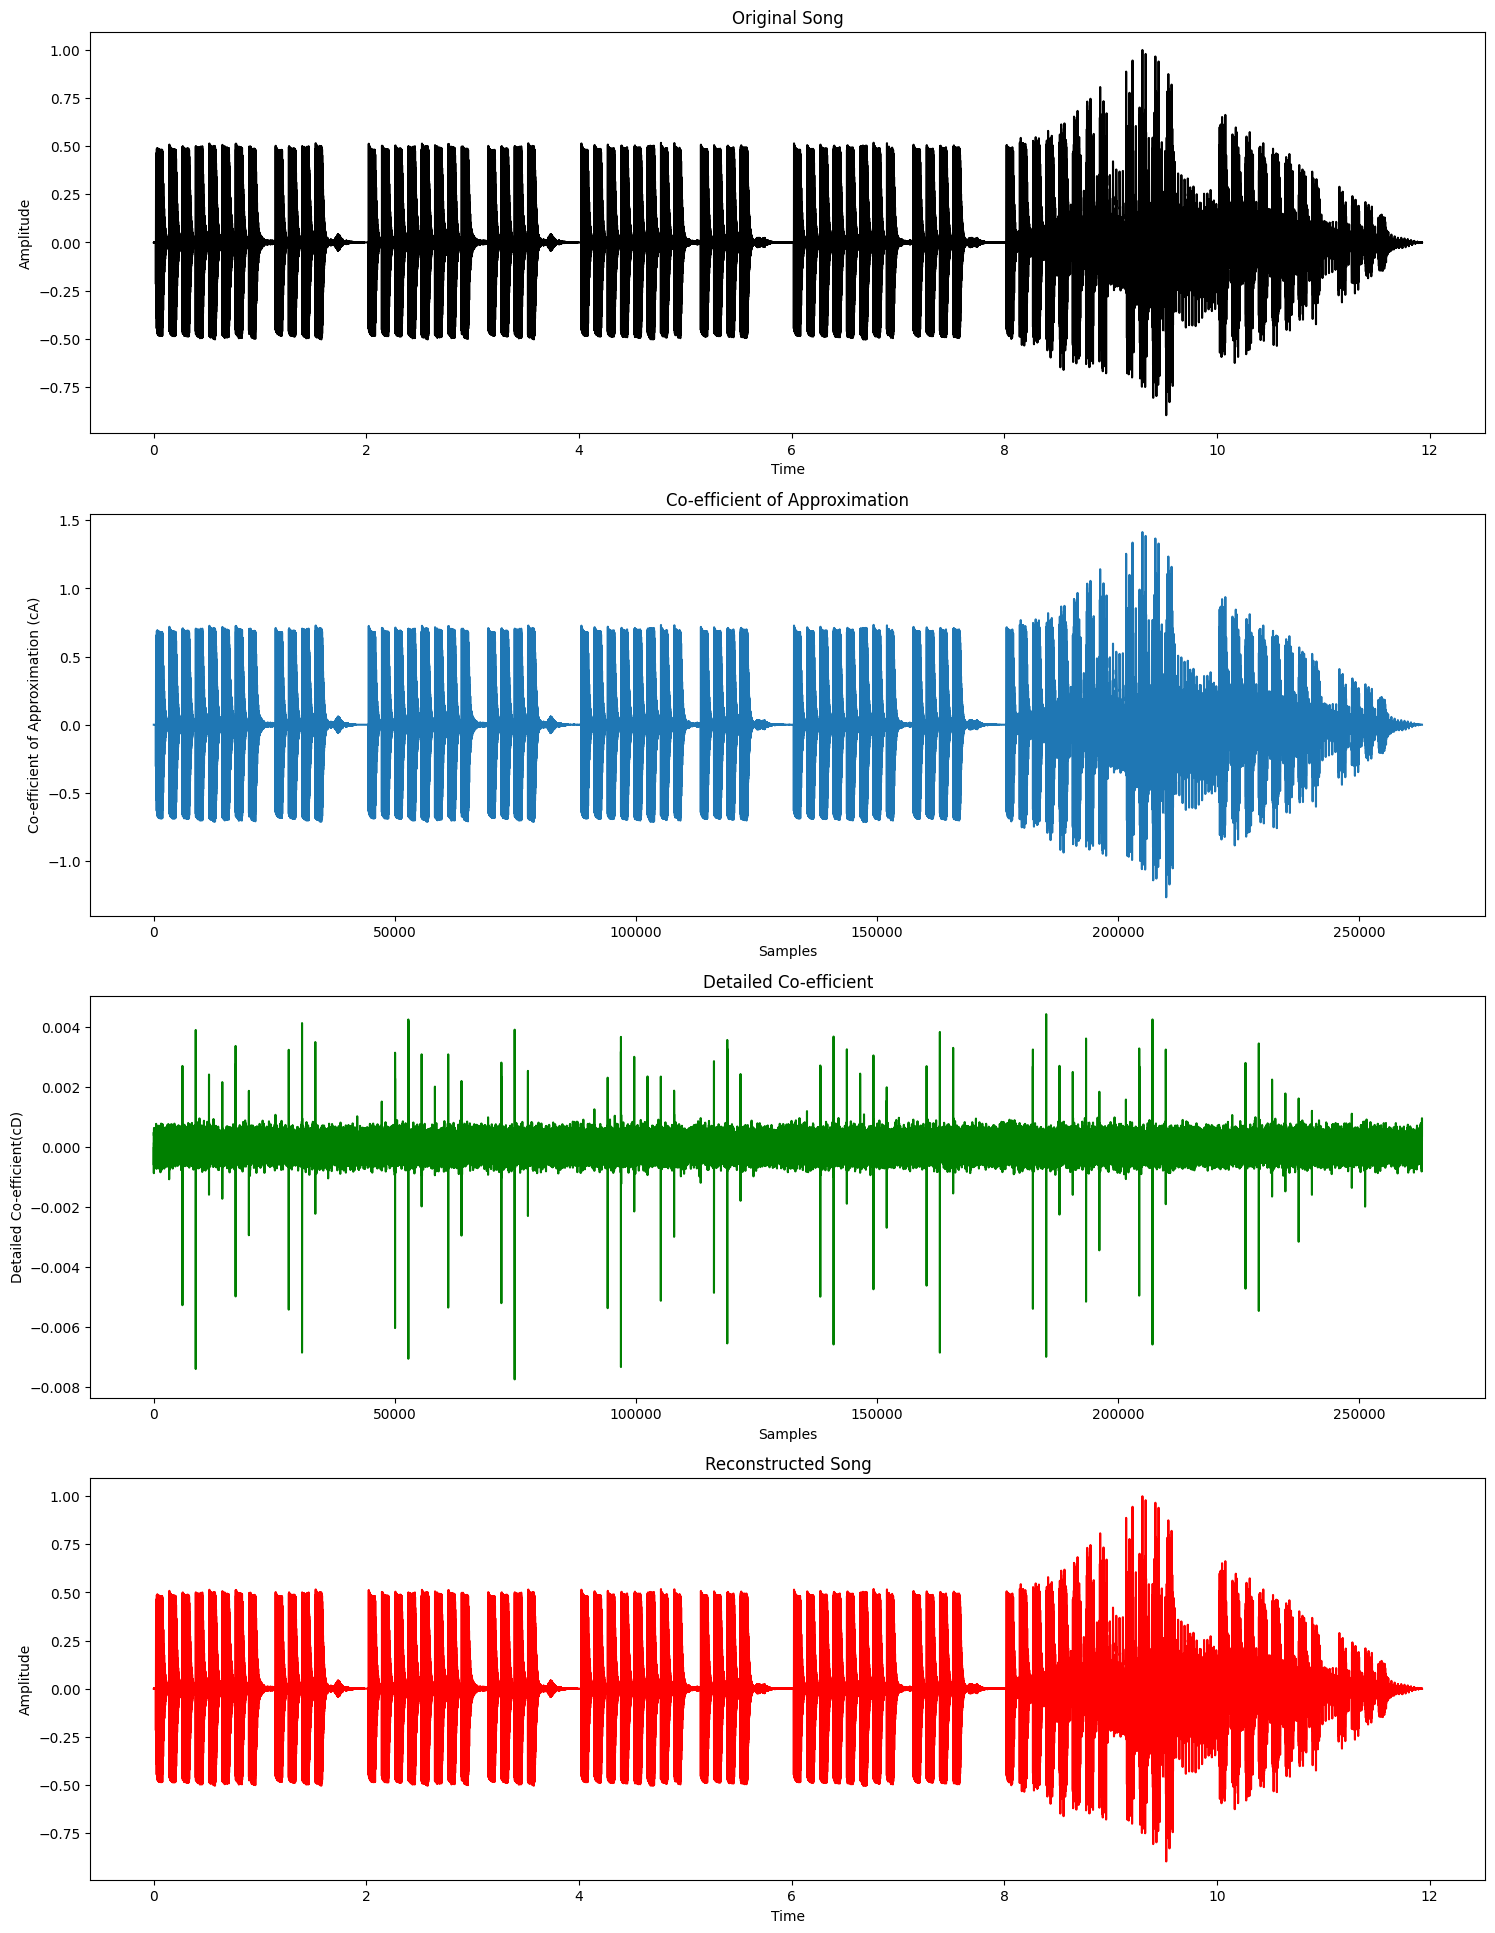

In [6]:
samplerate, song = wavfile.read("AudioSample.wav")

# Mono Audio Left
data = song[:,0]/max(song[:,0])

# Run play time
t = len(data)/float(samplerate)
time = np.arange(len(data))/float(samplerate)
print("Time in s: ",t)

# Co-efficient of Approximation -   cA : Captures Low frequency data
# Detaild Co-efficient          -   cD : Captures High frequency data
cA, cD = pywt.dwt(data, "bior6.8", "periodic")

# song out of decmposed cA and cD
y = pywt.idwt(cA, cD, "bior6.8", "periodic")
y = y[0:len(data)]

wavfile.write('AudioSample2.wav', samplerate, y)
wavfile.write('AudioSamplecD.wav', samplerate, cD)

# Plot
plt.rcParams["figure.figsize"] = (18, 24)

plt.subplots(4,1)

plt.subplot(411)
plt.plot(time, data, 'black')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Original Song")

plt.subplot(412)
plt.plot(cA)
plt.xlabel("Samples")
plt.ylabel("Co-efficient of Approximation (cA)")
plt.title("Co-efficient of Approximation")

plt.subplot(413)
plt.plot(cD, 'g')
plt.xlabel("Samples")
plt.ylabel("Detailed Co-efficient(cD)")
plt.title("Detailed Co-efficient")

plt.subplot(414)
plt.plot(time, y, 'r')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Reconstructed Song")

plt.savefig("Wavelet-Analysis.png")
plt.show()

### **Multi Level Decomposition**

## **Image Processing**

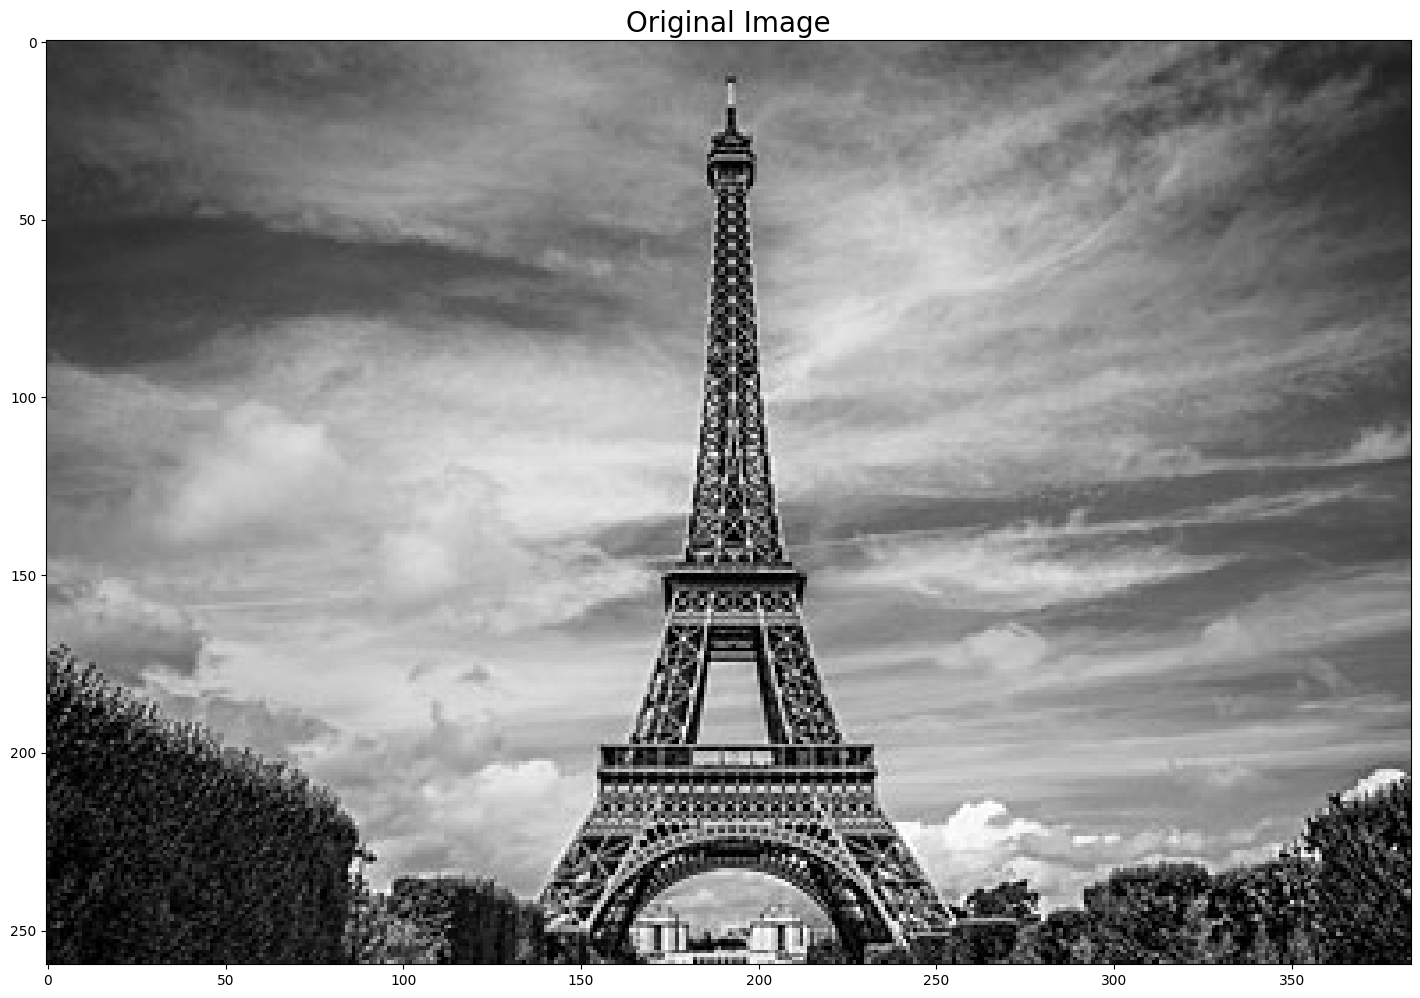

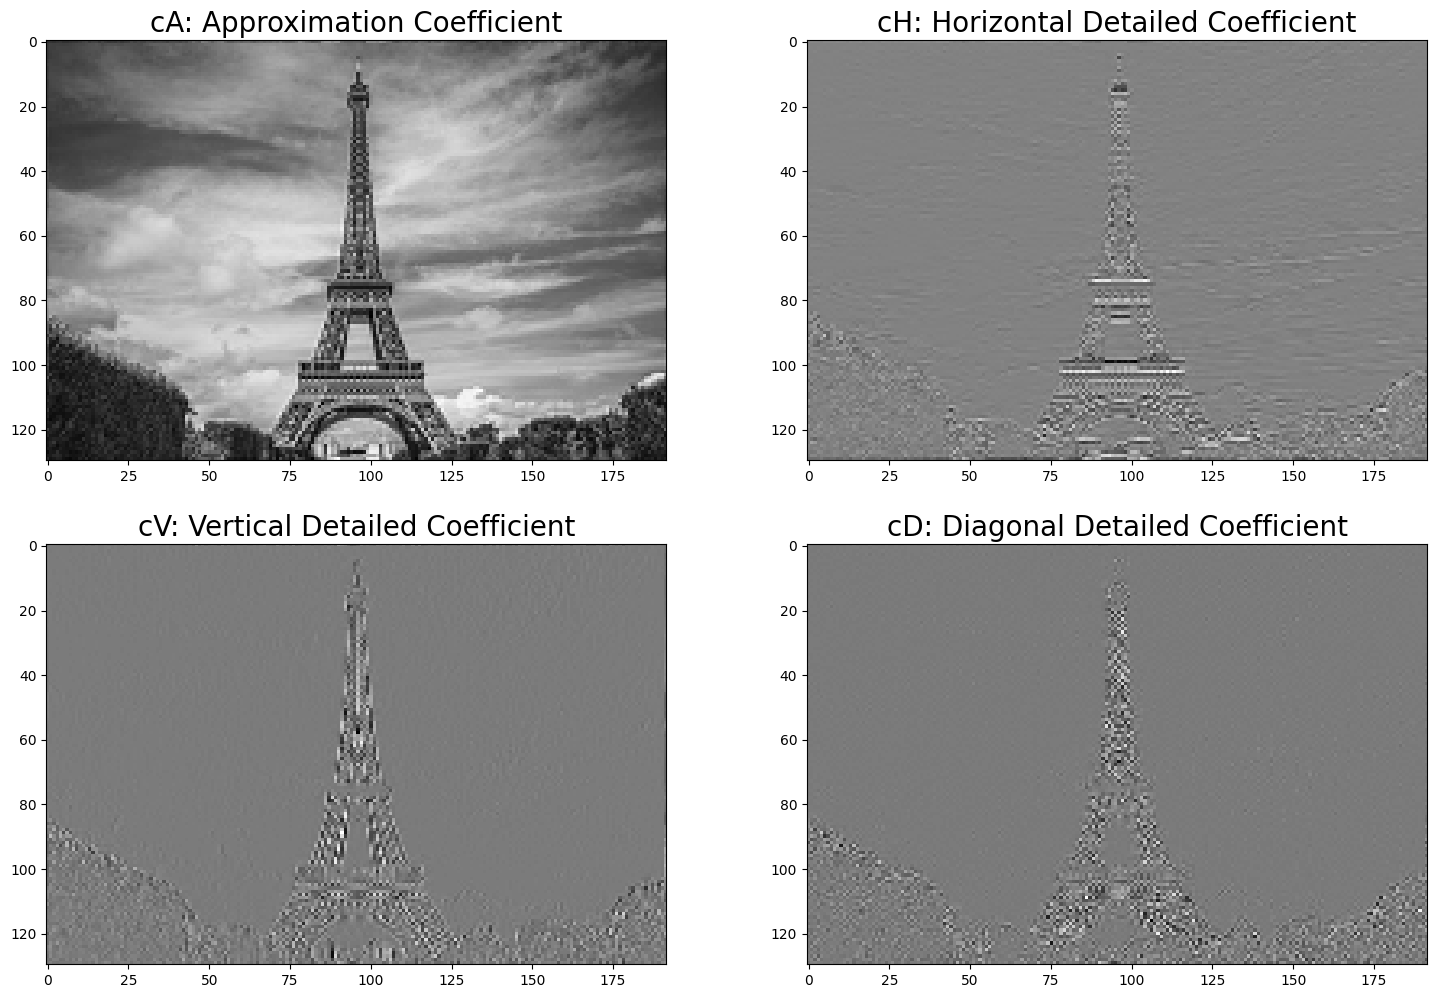

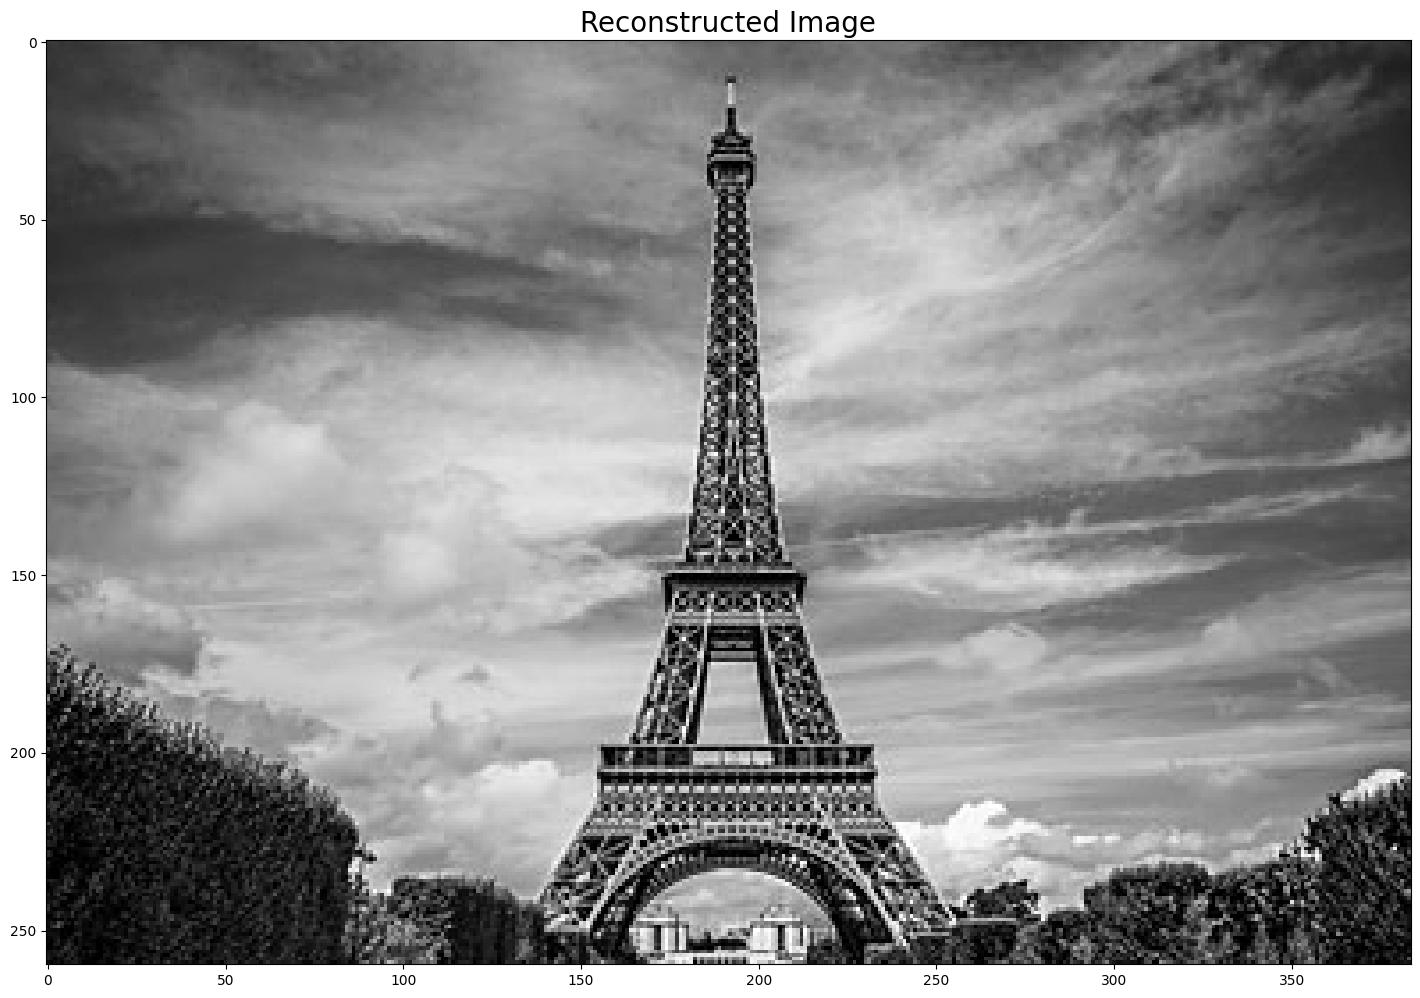

In [28]:
# Reading the image
img = cv2.imread("EiffelTower.jpg", cv2.IMREAD_GRAYSCALE)

# Performing dicrete wavelet transform on image
coeff2 = pywt.dwt2(img, 'sym2', mode = 'periodization')

# Obtaining Approximation, Horizontal detailed, Vertical detailed and Diagonal Detailed Matrices
cA, (cH, cV, cD) = coeff2

# Recontructing image
imgr = pywt.idwt2(coeff2, 'sym2', "periodization")
imgr = np.uint8(imgr)

# Plot
plt.rcParams["figure.figsize"] = (18, 12)

plt.imshow(img, cmap="gray")
plt.title("Original Image", fontsize = 20)
plt.show()

plt.subplots(2,2)

plt.subplot(221)
plt.imshow(cA, cmap="gray")
plt.title("cA: Approximation Coefficient", fontsize = 20)

plt.subplot(222)
plt.imshow(cH, cmap=plt.cm.gray)
plt.title("cH: Horizontal Detailed Coefficient", fontsize = 20)

plt.subplot(223)
plt.imshow(cV, cmap=plt.cm.gray)
plt.title("cV: Vertical Detailed Coefficient", fontsize = 20)

plt.subplot(224)
plt.imshow(cD, cmap=plt.cm.gray)
plt.title("cD: Diagonal Detailed Coefficient", fontsize = 20)

plt.show()

plt.imshow(imgr, cmap=plt.cm.gray)
plt.title("Reconstructed Image", fontsize = 20)

plt.show()